In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from utils import *
from algos import *
from plot import *

**Вариант 11**

In [4]:
def f(x):
  return x**4 + x**2 + x + 1

def fd1(x):
  return 4 * x**3 + 2 * x + 1

def fd2(x):
  return 12 * x**2 + 2

def fd3(x):
  return 24 * x

a, b = -1, 0
EXACT_MIN_POINT = Point(x=-0.38546, y=0.78520)

In [5]:
x0 = -0.5
assert fd1(-0.5) * fd3(-0.5) > 0 # Достаточное условие монотонной сходмимости Ньютона

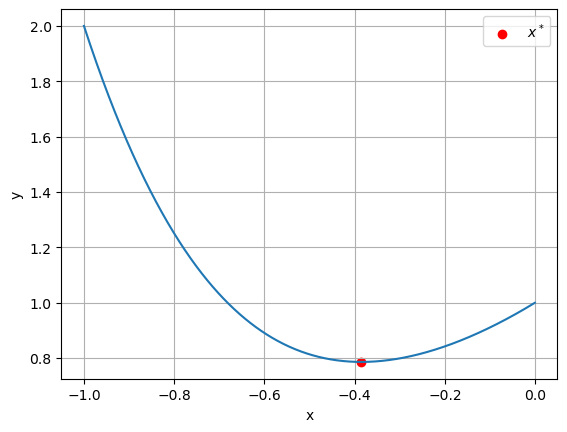

In [6]:
x = np.arange(a, b, 0.001)
y = [f(y) for y in x]

fig, ax = plt.subplots()
ax.scatter(EXACT_MIN_POINT.x, EXACT_MIN_POINT.y, c='r', label='$x^*$')
ax.plot(x, y)
ax.set(xlabel='x', ylabel='y')
ax.legend()
ax.grid()
plt.show()

In [13]:
for eps in (1e-1, 1e-2, 1e-3, 1e-4):
  print(f"ε: {eps}")

  f_wrap = LogPointsWrap(f)
  eps_point = brute_force(f=f_wrap, a=a, b=b, eps=eps)
  print(f'Перебор. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = bitwise_search(f=f_wrap, a=a, b=b, eps=eps, get_init_delta=lambda *args: eps*2.5)
  print(f'Поразрядный поиск. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = dichotomy(f=f_wrap, a=a, b=b, eps=eps)
  print(f'Дихотомия. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = golden_ratio(f=f_wrap, a=a, b=b, eps=eps)
  print(f'Золотое сечение. {eps_point}, N: {len(f_wrap.points)}')

  f_wrap = LogPointsWrap(f)
  eps_point = parabola(f=f_wrap, a=a, b=b, eps=eps, get_init_points=get_init_points_gr)
  print(f'Метод парабол. {eps_point}, N: {len(f_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  eps_point = midpoint(f=fd1_wrap, a=a, b=b, eps=eps)
  print(f'Метод средней точки. {eps_point}, Nd1: {len(f_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  eps_point = chord(f=fd1_wrap, a=a, b=b, eps=eps)
  print(f'Метод хорд. {eps_point}, Nd1: {len(f_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  fd2_wrap = LogPointsWrap(fd2)
  eps_point = newton(fd1=fd1_wrap, fd2=fd2_wrap, x0=x0, eps=eps)
  print(f'Метод Ньютона. {eps_point}, Nd1: {len(fd1_wrap.points)}, Nd2: {len(fd2_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  fd2_wrap = LogPointsWrap(fd2)
  eps_point = newton(fd1=fd1_wrap, fd2=fd2_wrap, x0=x0, eps=eps, use_tau=True)
  print(f'Метод Ньютона-Рафсона. {eps_point}, Nd1: {len(fd1_wrap.points)}, Nd2: {len(fd2_wrap.points)}')

  fd1_wrap = LogPointsWrap(fd1)
  fd2_wrap = LogPointsWrap(fd2)
  f_wrap   = LogPointsWrap(f)
  eps_point = newton(fd1=fd1_wrap, fd2=fd2_wrap, x0=x0, eps=eps, f=f_wrap)
  print(f'Метод Марквардта. {eps_point}, N: {len(f_wrap.points)}, Nd1: {len(fd1_wrap.points)}, Nd2: {len(fd2_wrap.points)}')
  print()

ε: 0.1
Перебор. Point(x=-0.3999999999999999, y=0.7856), N: 11
Поразрядный поиск. Point(x=-0.375, y=0.785400390625), N: 7
Дихотомия. Point(x=-0.43875, y=0.7908084140649414), N: 7
Золотое сечение. Point(x=-0.39918693812442196, y=0.7855557633718624), N: 7
Метод парабол. Point(x=-0.38201867513520715, y=None), N: 4
Метод средней точки. Point(x=-0.375, y=None), Nd1: 4
Метод хорд. Point(x=-0.36535699571553826, y=None), Nd1: 4
Метод Ньютона. Point(x=-0.38571428571428573, y=None), Nd1: 2, Nd2: 2
Метод Ньютона-Рафсона. Point(x=-0.38576485874560856, y=None), Nd1: 4, Nd2: 2
Метод Марквардта. Point(x=-0.39117138490394704, y=0.7852572737148062), N: 7, Nd1: 6, Nd2: 6
ε: 0.01
Перебор. Point(x=-0.39, y=0.7852344099999999), N: 101
Поразрядный поиск. Point(x=-0.3874999999999993, y=0.7852031494140626), N: 34
Дихотомия. Point(x=-0.383046875, y=0.7852062322061241), N: 13
Золотое сечение. Point(x=-0.38854381999831844, y=0.7852133038140368), N: 12
Метод парабол. Point(x=-0.38484083372280703, y=None), N: 5
Мет